# **Step-by-Step Guide to Handle Categorical Data and Use XGBoost**

In [ ]:
pip install xgboost


In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error

**Load and Preprocess the Dataset**

house_prices DataSet: [Link](https://www.openml.org/search?type=data&sort=runs&id=42165&status=active)

**Data Loading**: Fetch the dataset

**Preprocessing**: Convert categorical data to numerical using one-hot encoding*

**Splitting Data**: Split the data into training and test sets

**DMatrix**: A specialized data structure in XGBoost designed for efficient compuation. It optimizes memory usage and speeds up the training process by handling data storage and access more efficiently than standdard data formats. Additionally, it facilitates advance features such as missing value handline and sparsity-aware algorithms.


*the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy ([Credit](https://deepchecks.com/glossary/one-hot-encoding/#:~:text=One%2Dhot%20encoding%20in%20machine,categorical%20data%20in%20machine%20learning.))

In [ ]:
# Load dataset
boston = fetch_openml(data_id=42165)
X, y = boston.data, boston.target

# Convert categorical data to numerical using one-hot encoding
"""get_dummies: Each variable is converted in as many 0/1 variables as there are different values. """
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix
train_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Set Parameters and Train the Model**

**Setting Parameters**

**Parameter:**


*   **objective:** Determines the type of prediction problem (regression, classification, etc.).
*   **max_depth:**  Controls the complexity of the model. Deeper trees can model more complex relationships but may overfit.
*   **eta (learning rate):** Scales the contribution of each tree. Smaller values make the learning process more robust to overfitting but require more trees.
*   **subsample:**  Prevents overfitting by sampling the training data.
*   **colsample_bytree: **Reduces overfitting by sampling the features.


**Training:** The xgb.train method trains the model. The model iteratively builds trees, each correcting the errors of the previous ones.



In [ ]:
# Set parameters
params = {
    "objective": "reg:squarederror",  # Regression task
    "max_depth": 4,                   # Maximum depth of a tree
    "eta": 0.1,                       # Learning rate
    "subsample": 0.8,                 # Subsample ratio of the training instances
    "colsample_bytree": 0.8,          # Subsample ratio of columns
}

# Train the model
xgb_model = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=100)


**Predict and Evaluate**

**Making Predictions:** Use the trained model to make predictions on the test set.

**Evaluating the Model:** Calculate the mean squared error to assess performance.

In [ ]:
# Make Predictions
preds = xgb_model.predict(test_dmatrix)

# Evaluate the model
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 679577685.1785463


**Plot Feature Importance**

**Plotting Feature Importance:** Visualize the importance of different features.

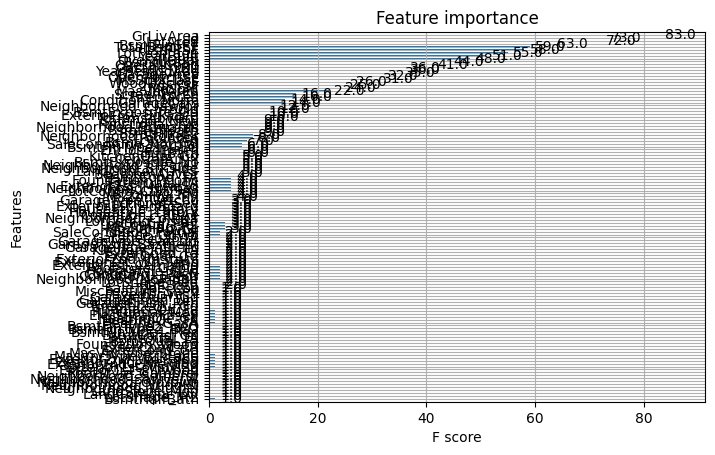

In [ ]:
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(xgb_model)
plt.show()

<Figure size 1200x1800 with 0 Axes>

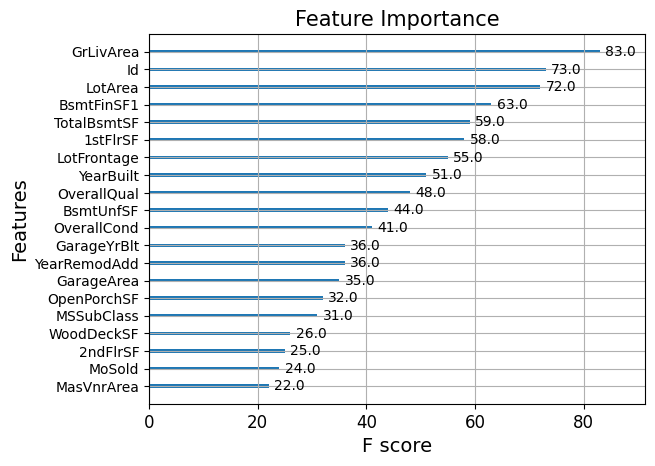

In [ ]:
# Cleaner Plot
plt.figure(figsize=(12, 18))
ax = xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=20) # Limit to top 20 features
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.ylabel('Features', fontsize=14)
plt.xlabel('F score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.show()

In our feature importance plot, we can see which features the XGBoost model found most useful in predicting house prices.
The feature 'GriLivArea', which represents the above-ground liviing area, is the most importance because it has the highest F score. (The model often uses this feature to split the data when making predictions)
'2ndFlr2F' and 'MoSold' are less influential in predicting the target variable.
By focusing on the top features, we can improve our data collection, feature engineering, and potentially build more efficient models.